# Heart Disease Prediction Project

This notebook runs the complete heart disease prediction project, including:
- Data exploration and analysis
- Feature engineering
- Model training and evaluation
- Model deployment (Streamlit app and API)

## Project Overview

This project predicts heart disease risk using machine learning models trained on clinical data. The system includes:
- Multiple ML models (Decision Tree, Random Forest, Logistic Regression, SVM)
- Interactive web application (Streamlit)
- REST API for predictions (FastAPI)
- Comprehensive model evaluation and comparison

## 1. Setup and Requirements

In [1]:
# Install required packages
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached fastapi-0.118.0-py3-none-any.whl.metadata (28 kB)
  Using cached pydantic-2.11.9-py3-none-any.whl.metadata (68 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached uvicorn-0.37.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-c

In [2]:
# Import necessary libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Import project modules
from model_utils import (
    load_data,
    preprocess,
    train_baselines,
    run_grid_search,
    evaluate_model,
    save_artifacts,
    load_artifacts
)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ Setup complete!")

✅ Setup complete!


## 2. Data Loading and Exploration

In [3]:
# Load the dataset
DATA_PATH = "heart_disease_dataset.csv"
df = load_data(DATA_PATH)

print("📊 Dataset Overview")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nTarget distribution:\n{df['heart_disease'].value_counts(normalize=True)}")

📊 Dataset Overview
Shape: (400, 14)

Columns: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']

Data types:
age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
heart_disease                int64
dtype: object

Missing values:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
restin

In [4]:
# Display first few rows
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [5]:
# Statistical summary
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,53.667500,0.662500,1.712500,123.630000,216.627500,0.140000,0.530000,146.717500,0.29250,0.753250,1.177500,0.677500,1.925000,0.555000
std,8.508403,0.473449,1.035628,16.567114,41.379941,0.347422,0.533678,21.104293,0.45548,0.772841,0.645784,0.889084,0.689611,0.497588
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,112.000000,188.000000,0.000000,0.000000,132.000000,0.00000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,124.000000,216.000000,0.000000,1.000000,146.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,3.000000,135.000000,246.000000,0.000000,1.000000,161.000000,1.00000,0.900000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,336.000000,1.000000,2.000000,202.000000,1.00000,4.900000,2.000000,3.000000,3.000000,1.000000


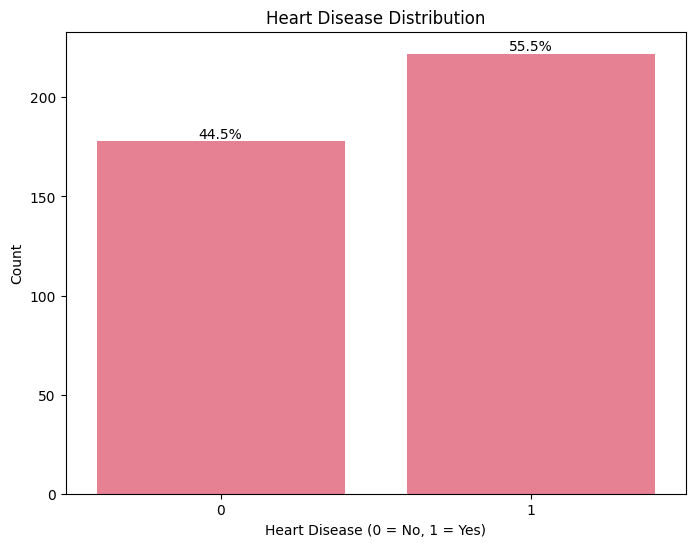

In [6]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='heart_disease')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

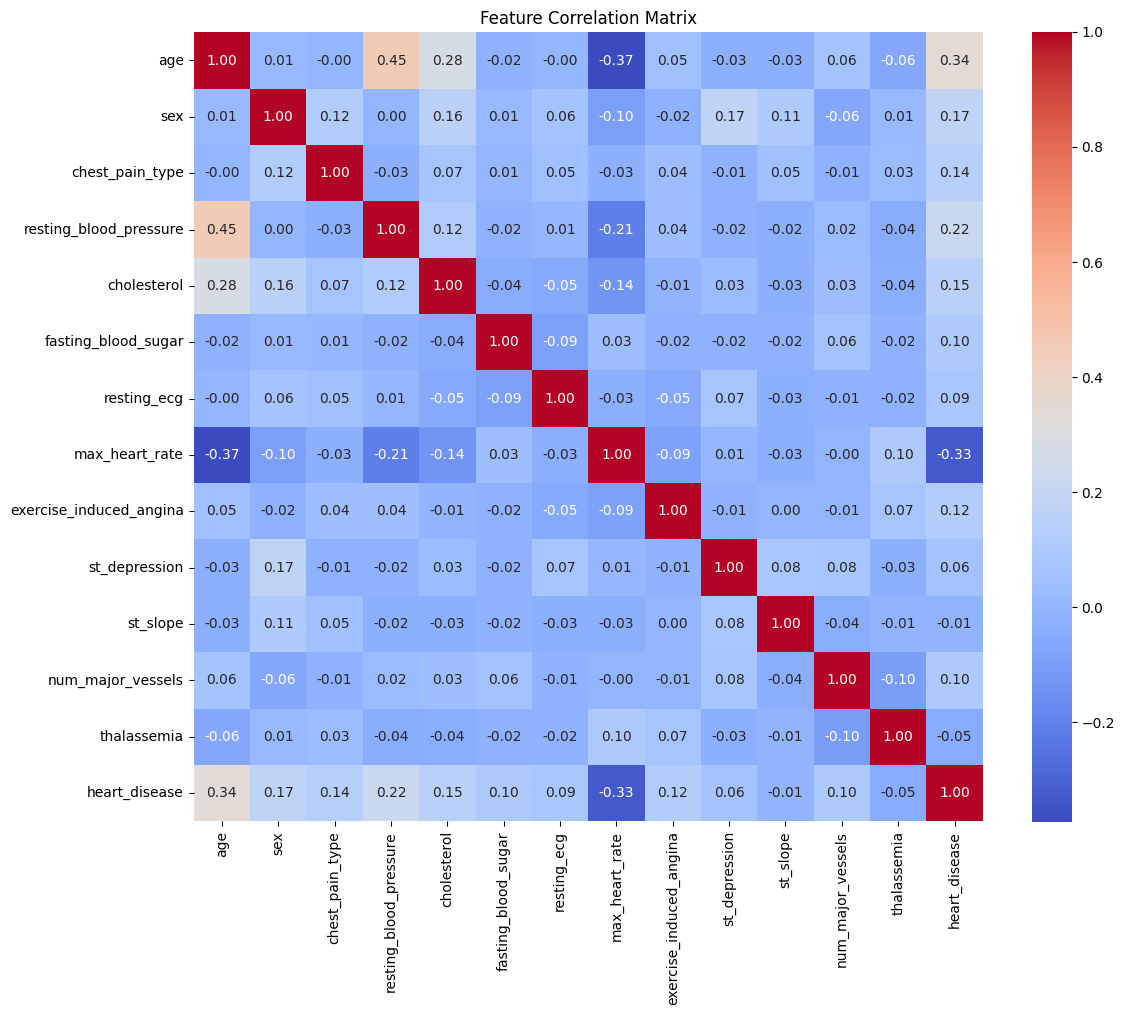

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

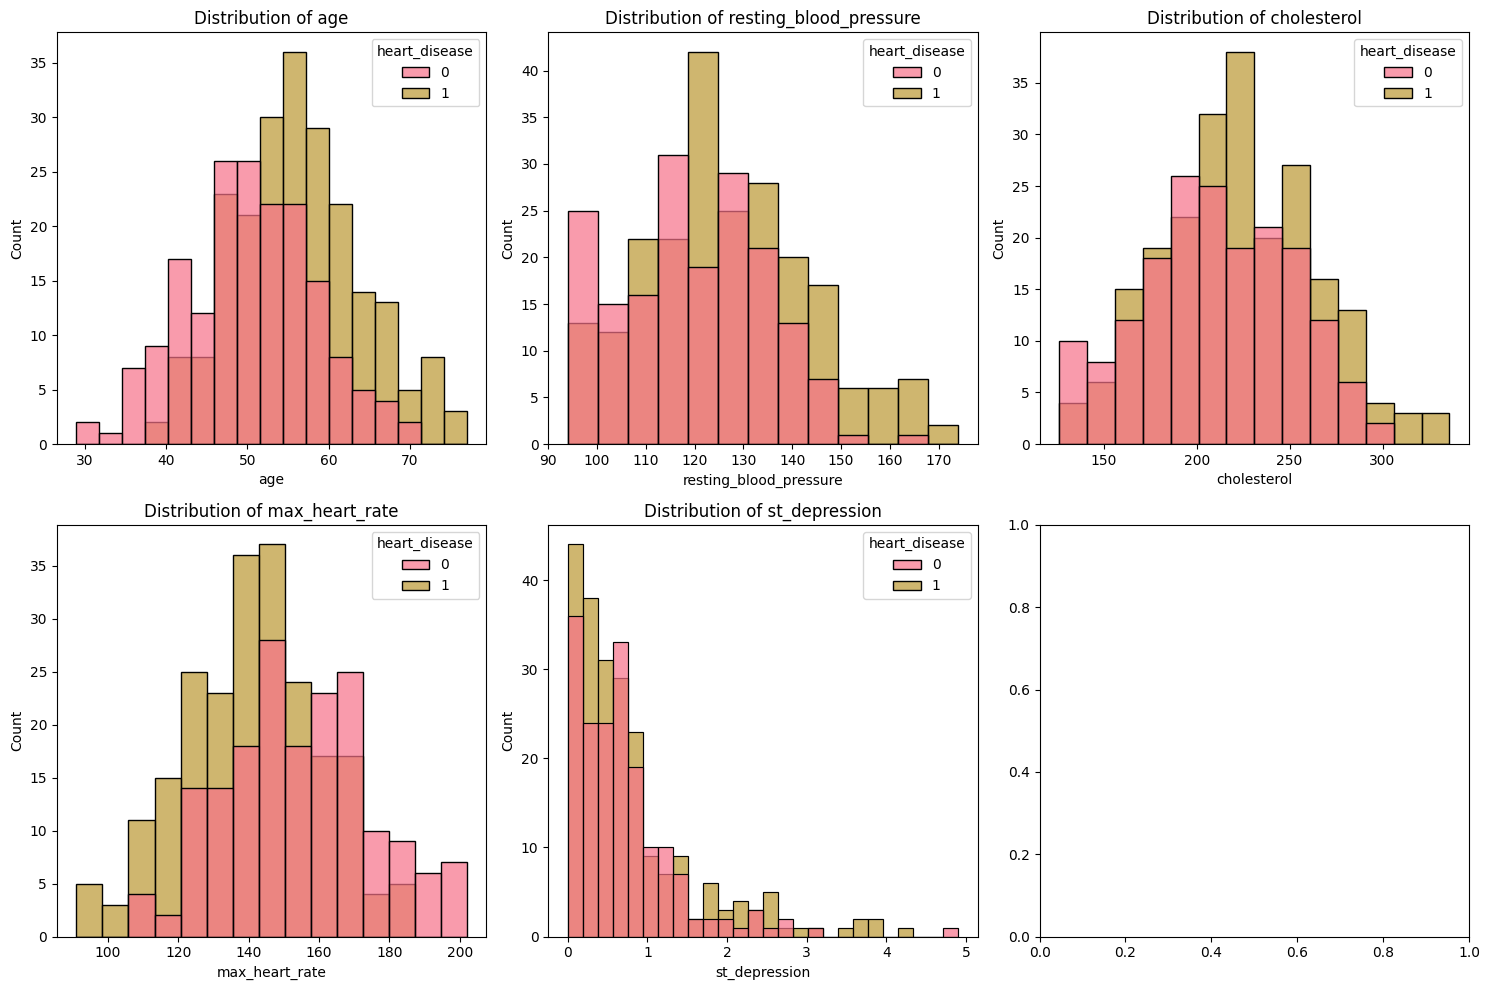

In [8]:
# Distribution of numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.histplot(data=df, x=feature, hue='heart_disease', ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

## 3. Feature Engineering and Preprocessing

In [9]:
# Preprocess the data
print("⚙️ Preprocessing data...")
X, y, scaler = preprocess(df, target_col="heart_disease")

print(f"✅ Preprocessing complete!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(df.drop(columns=['heart_disease']).columns)}")

⚙️ Preprocessing data...
✅ Preprocessing complete!
Features shape: (400, 13)
Target shape: (400,)
Feature names: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


In [10]:
# Split into train/test sets
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"Train target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

Train set: (320, 13), (320,)
Test set: (80, 13), (80,)
Train target distribution: [142 178]
Test target distribution: [36 44]


## 4. Model Training and Evaluation

In [11]:
# Train baseline models
print("🏗️ Training baseline models...")
baselines = train_baselines(X_train, y_train)
print("✅ Baseline models trained!")

# Quick evaluation of baselines
print("\n📊 Baseline Model Performance:")
for name, model in baselines.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name}: Train={train_score:.3f}, Test={test_score:.3f}")

🏗️ Training baseline models...
✅ Baseline models trained!

📊 Baseline Model Performance:
decision_tree: Train=1.000, Test=0.575
random_forest: Train=1.000, Test=0.713
logistic_regression: Train=0.722, Test=0.675
svm: Train=0.825, Test=0.662


In [12]:
# Hyperparameter optimization with grid search
print("\n🔍 Running grid search for hyperparameter optimization...")
best_models = run_grid_search(X_train, y_train)
print("✅ Grid search complete!")


🔍 Running grid search for hyperparameter optimization...
🔍 Grid searching: decision_tree
Fitting 5 folds for each of 90 candidates, totalling 450 fits
🔍 Grid searching: random_forest
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
🔍 Grid searching: logistic_regression
Fitting 5 folds for each of 40 candidates, totalling 200 fits
🔍 Grid searching: svm
Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Grid search complete!


In [13]:
# Evaluate optimized models
print("\n📊 Evaluating optimized models on test set...")
evaluations = {}

for name, info in best_models.items():
    estimator = info['best_estimator']
    eval_res = evaluate_model(estimator, X_test, y_test)
    evaluations[name] = {
        "best_params": info["best_params"],
        "cv_score": info["best_score"],
        "test_eval": eval_res
    }

print("✅ Evaluation complete!")


📊 Evaluating optimized models on test set...
✅ Evaluation complete!


In [14]:
# Display evaluation results
print("\n📈 Model Performance Summary:")
results_df = []
for name, eval_data in evaluations.items():
    test_eval = eval_data['test_eval']
    results_df.append({
        'Model': name.replace('_', ' ').title(),
        'CV ROC-AUC': f"{eval_data['cv_score']:.4f}",
        'Test ROC-AUC': f"{test_eval['roc_auc']:.4f}",
        'Test Accuracy': f"{test_eval['classification_report']['accuracy']:.4f}",
        'Test Precision': f"{test_eval['classification_report']['weighted avg']['precision']:.4f}",
        'Test Recall': f"{test_eval['classification_report']['weighted avg']['recall']:.4f}",
        'Test F1-Score': f"{test_eval['classification_report']['weighted avg']['f1-score']:.4f}"
    })

results_df = pd.DataFrame(results_df)
results_df


📈 Model Performance Summary:


,Model,CV ROC-AUC,Test ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Decision Tree,0.6225,0.6228,0.5875,0.5820,0.5875,0.5732
1,Random Forest,0.7322,0.7494,0.6625,0.6632,0.6625,0.6541
2,Logistic Regression,0.7569,0.7424,0.6875,0.6868,0.6875,0.6871
3,Svm,0.7579,0.7418,0.5500,0.3025,0.5500,0.3903


In [15]:
# Choose best model
best_name = max(evaluations.keys(), key=lambda n: evaluations[n]["test_eval"]["roc_auc"])
chosen_estimator = best_models[best_name]["best_estimator"]

print(f"🏆 Best model: {best_name}")
print(f"Test ROC-AUC: {evaluations[best_name]['test_eval']['roc_auc']:.4f}")
print(f"Best parameters: {evaluations[best_name]['best_params']}")

🏆 Best model: random_forest
Test ROC-AUC: 0.7494
Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


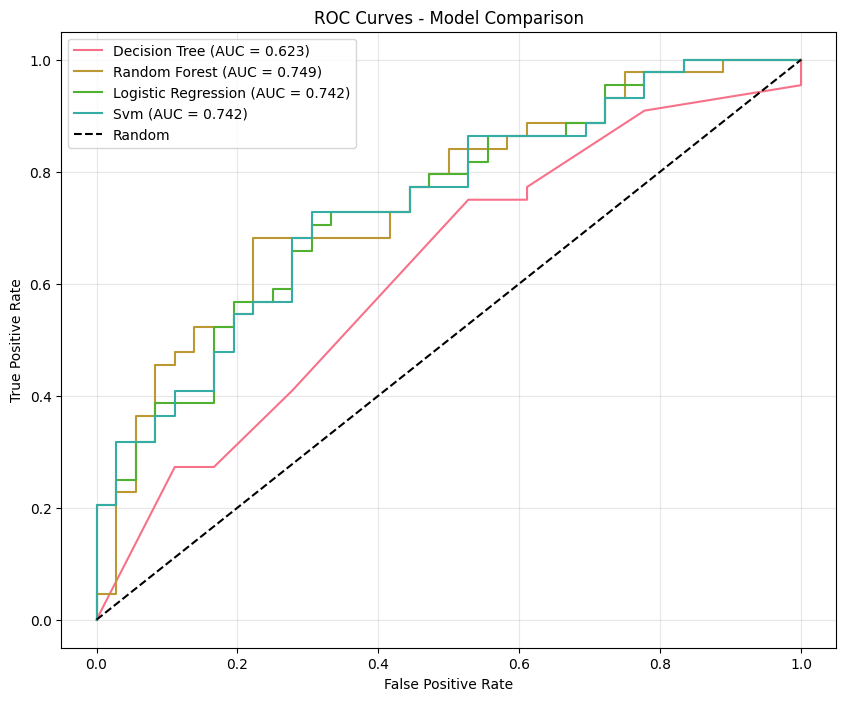

In [16]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, eval_data in evaluations.items():
    estimator = best_models[name]['best_estimator']
    y_prob = estimator.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f'{name.replace("_", " ").title()} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Save Model Artifacts

In [17]:
# Save the best model and artifacts
ARTIFACTS_DIR = "artifacts"

metadata = {
    "chosen_model": best_name,
    "evaluations": evaluations,
    "feature_names": list(df.drop(columns=['heart_disease']).columns),
    "training_info": {
        "test_size": TEST_SIZE,
        "random_state": RANDOM_STATE,
        "train_shape": X_train.shape,
        "test_shape": X_test.shape
    }
}

save_artifacts(chosen_estimator, scaler, metadata, artifacts_dir=ARTIFACTS_DIR)
print(f"✅ Model artifacts saved to {ARTIFACTS_DIR}/")
print("Files saved:")
print("- best_model.pkl")
print("- scaler.pkl")
print("- metadata.json")

✅ Model artifacts saved to artifacts/
Files saved:
- best_model.pkl
- scaler.pkl
- metadata.json


## 6. Load and Test Model

In [18]:
# Load the saved model
loaded_model, loaded_scaler, loaded_metadata = load_artifacts(ARTIFACTS_DIR)

print("✅ Model artifacts loaded successfully!")
print(f"Model type: {type(loaded_model).__name__}")
print(f"Chosen model: {loaded_metadata.get('chosen_model', 'Unknown')}")
print(f"Test ROC-AUC: {loaded_metadata['evaluations'][best_name]['test_eval']['roc_auc']:.4f}")

✅ Model artifacts loaded successfully!
Model type: RandomForestClassifier
Chosen model: random_forest
Test ROC-AUC: 0.7494


In [19]:
# Test prediction with sample data
sample_features = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]  # Same as in test files
sample_features_scaled = loaded_scaler.transform(np.array(sample_features).reshape(1, -1))

prediction = loaded_model.predict(sample_features_scaled)[0]
probability = loaded_model.predict_proba(sample_features_scaled)[0][1]

print("\n🧪 Sample Prediction:")
print(f"Features: {sample_features}")
print(f"Prediction: {prediction} ({'High Risk' if prediction == 1 else 'Low Risk'})")
print(f"Probability of heart disease: {probability:.4f} ({probability*100:.1f}%)")


🧪 Sample Prediction:
Features: [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
Prediction: 1 (High Risk)
Probability of heart disease: 0.7448 (74.5%)


## 7. Run Streamlit Application

In [20]:
# Note: Run this in a separate terminal or use the command below
# The Streamlit app provides an interactive web interface for predictions

print("🚀 To run the Streamlit application:")
print("1. Open a new terminal")
print("2. Run: streamlit run streamlit_app.py")
print("3. Open the provided URL in your browser")

# Alternative: Run in background (may not work in all environments)
# !streamlit run streamlit_app.py --server.headless true --server.port 8501

🚀 To run the Streamlit application:
1. Open a new terminal
2. Run: streamlit run streamlit_app.py
3. Open the provided URL in your browser


## 8. Run FastAPI Server

In [21]:
# Note: Run this in a separate terminal
# The API provides REST endpoints for programmatic predictions

print("🚀 To run the FastAPI server:")
print("1. Open a new terminal")
print("2. Run: python run_api.py")
print("3. API will be available at http://localhost:8002")
print("4. Documentation at http://localhost:8002/docs")

# Alternative: Run in background (may not work in all environments)
# import subprocess
# api_process = subprocess.Popen(["python", "run_api.py"])
# print("API server started in background")

🚀 To run the FastAPI server:
1. Open a new terminal
2. Run: python run_api.py
3. API will be available at http://localhost:8002
4. Documentation at http://localhost:8002/docs


9. Summary

In [23]:
print("🎉 Heart Disease Prediction Project Complete!")
print("\n📋 What was accomplished:")
print("✅ Data exploration and visualization")
print("✅ Feature preprocessing and scaling")
print("✅ Multiple model training and optimization")
print("✅ Comprehensive model evaluation")
print("✅ Model artifacts saved")
print("✅ Interactive Streamlit application ready")
print("✅ REST API for programmatic access ready")
print("\n🚀 To use the system:")
print("1. Run: streamlit run streamlit_app.py (for web interface)")
print("2. Run: python run_api.py (for API access)")
print("3. Use test_api.py to test API predictions")
print("\n📊 Best Model Performance:")
print(f"Model: {best_name}")
print(f"Test ROC-AUC: {evaluations[best_name]['test_eval']['roc_auc']:.4f}")
print(f"Test Accuracy: {evaluations[best_name]['test_eval']['classification_report']['accuracy']:.4f}")

🎉 Heart Disease Prediction Project Complete!

📋 What was accomplished:
✅ Data exploration and visualization
✅ Feature preprocessing and scaling
✅ Multiple model training and optimization
✅ Comprehensive model evaluation
✅ Model artifacts saved
✅ Interactive Streamlit application ready
✅ REST API for programmatic access ready

🚀 To use the system:
1. Run: streamlit run streamlit_app.py (for web interface)
2. Run: python run_api.py (for API access)
3. Use test_api.py to test API predictions

📊 Best Model Performance:
Model: random_forest
Test ROC-AUC: 0.7494
Test Accuracy: 0.6625
